In [58]:
import pandas as pd

# RegEx

# NLP (Sklearn)

1) Text Preprocessing
2) Vectorizing
3) NLP Modeling: Naive Bayes Classifier
4) Topic Modeling: the Latent Dirichlet Allocation Algorithm (LDA) (Unsupervised)

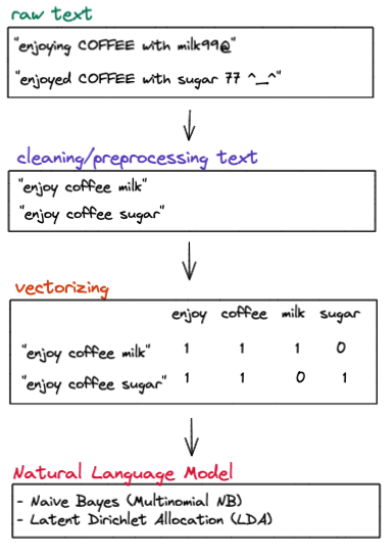


## Text Preprocessing

👨🏻‍🏫 For any Machine Learning algorithm, data preprocessing is crucial, and this holds true for algorithms dealing with texts

✍️ Text preprocessing is quite different from numerical preprocessing. The most common preprocessing tasks for textual data are:

    lowercase
    dealing with numbers, punctuation and symbols
    splitting
    tokenizing
    removing "stopwords"
    lemmatizing



### Basic cleaning with Python core string operations

When you have some unstructured text, you can already clean it with some Python built-in string operations

#### 💻 ✂️ strip (1/2)

`strip` removes all the whitespaces at the beginning and the end of a string

In [2]:
texts = ['   Bonjour, comment ca va ?     ',
         '    Heyyyyy, how are you doing ?   ',
         '        Hallo, wie gehts ?     ']
texts

['   Bonjour, comment ca va ?     ',
 '    Heyyyyy, how are you doing ?   ',
 '        Hallo, wie gehts ?     ']

In [4]:
[text.strip() for text in texts]

['Bonjour, comment ca va ?',
 'Heyyyyy, how are you doing ?',
 'Hallo, wie gehts ?']

#### 💻 ✂️ strip (2/2)

You can also specify a "list" of characters (in the form of a single and unordered string) to be removed at the beginning and at the end of a string

Note that only the first instance of each of the characters will be stripped.

In [5]:
text = "abcd Who is abcd ? That's not a real name!!! abcd"
text

"abcd Who is abcd ? That's not a real name!!! abcd"

In [6]:
text.strip('bdac')

" Who is abcd ? That's not a real name!!! "

#### 💻 👥 replace

In [7]:
text = "I love koalas, koalas are the cuttest animals on Earth."
text

'I love koalas, koalas are the cuttest animals on Earth.'

In [11]:
text.replace("koala","honey badger")

'I love honey badgers, honey badgers are the cuttest animals on Earth.'

#### 💻 🪚 split

In [12]:
text = "alicia keys / bts /justin bieber"

In [14]:
text.split("/")

['alicia keys ', ' bts ', 'justin bieber']

#### 💻 🔡 Lowercase

Text modeling algorithms are case-sensitive. Two words need to have the same casing to be considered equal.

In [15]:
text = "i LOVE football sO mUch. FOOTBALL is my passion. Who else loves fOOtBaLL ?"
text

'i LOVE football sO mUch. FOOTBALL is my passion. Who else loves fOOtBaLL ?'

In [17]:
text.lower() 

'i love football so much. football is my passion. who else loves football ?'

#### 💻 🔢 Numbers


✅ We can remove the numbers during the text preprocessing steps, especially for:

    text clustering
    collecting keyphrases

In [19]:
text = "i do not recommend this restaurant, we waited for so long, like 30 minutes, this is ridiculous"
text

'i do not recommend this restaurant, we waited for so long, like 30 minutes, this is ridiculous'

In [20]:
cleaned_text = ''.join(char for char in text if not char.isdigit())
cleaned_text

'i do not recommend this restaurant, we waited for so long, like  minutes, this is ridiculous'

#### 💻❗️❓ Punctuation and Symbols


    Punctuation like ".?!" and symbols like "@#$" are not useful for topic modeling.
    Punctuation is barely used in a proper way on social media platforms.

Warning: you might want to keep punctuation and symbols for authorship attribution!

In [22]:
text = "I love bubble tea! OMG so #tasty @channel XOXO @$ ^_^ "
text

'I love bubble tea! OMG so #tasty @channel XOXO @$ ^_^ '

In [24]:
import string # "string" module is already installed with Python
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
for punctuation in string.punctuation:
    text = text.replace(punctuation, '') 
    
text

'I love bubble tea OMG so tasty channel XOXO   '

#### 💻 💪 Combo: strip + lowercase + numbers + punctuation/symbols

In [28]:
sentences = ["   I LOVE Pizza 999 @^_^", 
             "  Le Wagon is amazing, take care - 666"]

In [29]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    
    sentence = sentence.strip()
    
    return sentence

In [30]:
cleaned_sentences = [basic_cleaning(sentence) for sentence in sentences]
cleaned_sentences

['i love pizza', 'le wagon is amazing take care']

#### 💻 🔍 Removing Tags with RegEx

We can remove `HTML` tags using [RegEx](https://regexr.com/):

In [31]:
import re

text = """<head><body>Hello Le Wagon!</body></head>"""
cleaned_text = re.sub('<[^<]+?>','', text)

print (cleaned_text)


Hello Le Wagon!


In [32]:
import re

txt = 'This is a random text, authored by darkvador@gmail.com and batman@outlook.com, WOW!'

re.findall('[\w.+-]+@[\w-]+\.[\w.-]+', txt)


['darkvador@gmail.com', 'batman@outlook.com']

### Cleaning with NLTK

**Natural Language Toolkit (NLTK)** is an **NLP library** that provides preprocessing and modeling tools for text data

[📚 NLTK official website](https://www.nltk.org/)

[🛠 Installation Documentation](https://www.nltk.org/install.html)

#### 💻 🌲 Tokenizing

    - Tokenizing is essentially splitting a sentence, a paragraph, or even an entire piece of text into smaller chunks such as individual words called tokens.
    
        - "Natural Language Processing" → ["Natural","Language","Processing"]

[📚 nltk.tokenize](https://www.nltk.org/api/nltk.tokenize.html)

🔅 Here is a quote from Aristotle:

In [33]:
text = "It is during our darkest moments that we must focus to see the light"
text

'It is during our darkest moments that we must focus to see the light'

In [34]:
from nltk.tokenize import word_tokenize

word_tokens = word_tokenize(text)
word_tokens

['It',
 'is',
 'during',
 'our',
 'darkest',
 'moments',
 'that',
 'we',
 'must',
 'focus',
 'to',
 'see',
 'the',
 'light']

#### 💻 🛑 Stopwords

   - Stopwords are words that are used so frequently that they don't carry much information, especially for topic modeling
   - NLTK has an built-in corpus of English stopwords that can be loaded and used

In [35]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) # you can also choose other languages

list(stop_words)[0:10]

🕺🏻 Here is an example of a tokenized sentence:

In [39]:
tokens = ["i", "am", "going", "to", "go", "to", "the", "club", 
          "and","party", "all", "night", "long"]

❓ What stopwords could be removed ❓

In [41]:
stopwords_removed = [w for w in tokens if w in stop_words] 

stopwords_removed

['i', 'am', 'to', 'to', 'the', 'and', 'all']

❓ What are the meaningful words in this sentence ❓

In [42]:
tokens_cleaned = [w for w in tokens if not w in stop_words] 

tokens_cleaned

['going', 'go', 'club', 'party', 'night', 'long']



👉 What if you are not going to the party?

😱 "not" is also considered as a stopword

✅ Removing stopwords is useful for:

    topic modeling

❌ Dangerous for:

    sentiment analysis
    authorship attribution



#### 💻 🌐 Lemmatizing

Lemmatizing is a technique used to find the root of words, in order to group them by their meaning rather than by their exact form.

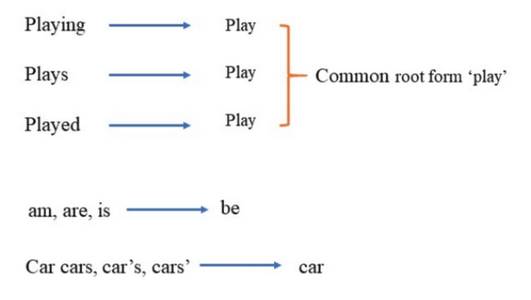



[📚 nltk.stem - WordNetLemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html)

👇 Look at the following sentence:

In [46]:
sentence = 'He was RUNNING and EATING at the same time =[. He has a bad habit of swimming after playing 3 hours in the Sun =/'

🗓 Let's apply the following steps:

    Basic cleaning
    Tokenizing
    Removing stopwords
    Lemmatizing

🧹 Step 1: Basic Cleaning

In [44]:
sentence

'He was RUNNING and EATING at the same time =[. He has a bad habit of swimming after playing 3 hours in the Sun =/'

In [50]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    
    sentence = sentence.strip()
    
    return sentence

In [51]:
cleaned_sentence = basic_cleaning(sentence)
cleaned_sentence

'he was running and eating at the same time  he has a bad habit of swimming after playing  hours in the sun'

🎄 Step 2 : Tokenize

Reminder: tokenizing means breaking a sentence down into a list of words, called "tokens")

In [52]:
from nltk.tokenize import word_tokenize

tokenized_sentence = word_tokenize(cleaned_sentence)
tokenized_sentence

['he',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'the',
 'same',
 'time',
 'he',
 'has',
 'a',
 'bad',
 'habit',
 'of',
 'swimming',
 'after',
 'playing',
 'hours',
 'in',
 'the',
 'sun']

🛑 Step 3: Remove Stopwords

In [53]:
from nltk.corpus import stopwords

tokenized_sentence_no_stopword = [w for w in tokenized_sentence if not w in stop_words] 
tokenized_sentence_no_stopword

['running',
 'eating',
 'time',
 'bad',
 'habit',
 'swimming',
 'playing',
 'hours',
 'sun']

🌐 Step 4: Lemmatizing

[📚 WordNetLemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html)

In [57]:
from nltk.stem import WordNetLemmatizer

# Lemmatizing the verbs
verb_lemmatized = [WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
                   for word in tokenized_sentence_no_stopword]                 
              

# 2 - Lemmatizing the nouns
noun_lemmatized = [WordNetLemmatizer().lemmatize(word, pos = "n")  # n --> nouns
                   for word in verb_lemmatized]

In [63]:
df_lemmatized = pd.DataFrame({
    'original word': tokenized_sentence_no_stopword,
    'lemmatized verbs': verb_lemmatized,
    'lemmatized nouns': noun_lemmatized
})

df_lemmatized.style.hide_index()

original word,lemmatized verbs,lemmatized nouns
running,run,run
eating,eat,eat
time,time,time
bad,bad,bad
habit,habit,habit
swimming,swim,swim
playing,play,play
hours,hours,hour
sun,sun,sun


✅ Lemmatizing is useful for:

    topic modeling
    sentiment analysis

🥡 Takeaways about preprocessing text

    First of all, we can perform some pre-cleaning operations on the pieces of text of a corpus using Python built-in functions such as:
        ✂️ strip
        👥 replace
        🪚 split
        🔡 lowercase
        🔢 removing numbers
        ❗️ removing punctuation and symbols

    Next, we can apply preprocessing techniques to prepare the pieces of text for NLP algorithms
        🎄 Tokenizing
        🛑 Removing stopwords
        🌐 Lemmatizing

🤔 Now that the text is preprocessed, how can it be analyzed by Machine Learning algorithms?

## Vectorizing

🤖 Machine Learning algorithms cannot process raw text, as it needs to be converted into numbers first

🧑🏻‍🏫 **Vectorizing** = the process of converting raw text into a numerical representation

There are multiple vectorizing techniques. Among them, we will present:

   - Bag-of-Words
   - Tf_idf
   - N-grams

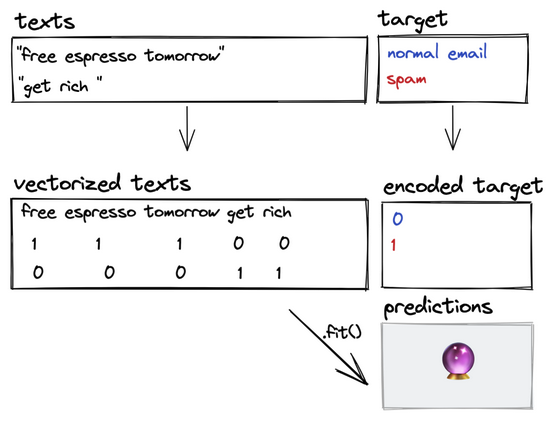

### `Bag-of-Words` representation



👩🏻‍🏫 *Bag-of-Words representation(BoW)* is one of the most simple and effective ways to represent text for ML models.

   - When using this representation, we are simply counting **how often** each **word** appears in each **document** of a **corpus**
   - The count for each word becomes a feature:

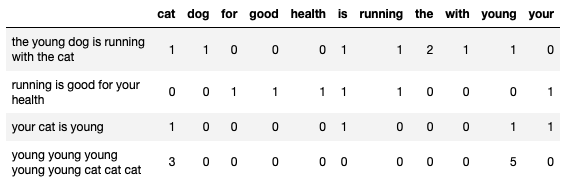

#### 💻 CountVectorizer

💪 In Scikit-Learn, there is a tool called `CountVectorizer` to generate `Bag-of-Words` representations of a set of texts

👉 `CountVectorizer` converts a collection of text documents into a matrix of token counts

📚 [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

👇 Look at the following sentences:


In [65]:
texts = ['the young dog is running with the cat',
         'running is good for your health',
         'your cat is young',
         'young young young young young cat cat cat']

👩🏻‍🔬 Let's apply the `CountVectorizer` to generate a `Bag-of-Words` representation of these four sentences

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(texts)
X.toarray()

array([[1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]])

🤔 Can you guess which column represents which word?

🔥 As soon as the CountVectorizer is fitted to the text, you can retrieve all the words seen with get_feature_names_out():

In [68]:
count_vectorizer.get_feature_names_out()

array(['cat', 'dog', 'for', 'good', 'health', 'is', 'running', 'the',
       'with', 'young', 'your'], dtype=object)

In [69]:
import pandas as pd

vectorized_texts = pd.DataFrame(X.toarray(), 
                                columns = count_vectorizer.get_feature_names_out(),
                                index = texts)

vectorized_texts

,cat,dog,for,good,health,is,running,the,with,young,your
the young dog is running with the cat,1,1,0,0,0,1,1,2,1,1,0
running is good for your health,0,0,1,1,1,1,1,0,0,0,1
your cat is young,1,0,0,0,0,1,0,0,0,1,1
young young young young young cat cat cat,3,0,0,0,0,0,0,0,0,5,0


Be aware that there are some limitations when it comes to the bag-of-words representation:

   - ❌ A BoW does NOT take into account the order of the words → hence the name "Bag of Words"
   - ❌ A BoW does NOT take into account a document's length → Tf-idf to the rescue
   - ❌ A BoW does NOT capture document context → N-gram to the rescue

### `Tf-idf` representation


**Term Frequency (tf) & CountVectorizer**

   - The more often a word appears in a document, the more likely it is that it will be important to this document

Example: if the word elections appears frequently in a document, it is obvious that this document deals with politics.

   - The frequency of a word x in a document d is called term frequency, and is denoted by 

❓ In our last example, could we compute ❓

In [70]:
vectorized_texts

,cat,dog,for,good,health,is,running,the,with,young,your
the young dog is running with the cat,1,1,0,0,0,1,1,2,1,1,0
running is good for your health,0,0,1,1,1,1,1,0,0,0,1
your cat is young,1,0,0,0,0,1,0,0,0,1,1
young young young young young cat cat cat,3,0,0,0,0,0,0,0,0,5,0


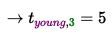

**Document Frequency (df)**



   - If a word appears in many documents of a corpus, however, it shouldn't be that important to understand the corpus.

_Example_: on eurosport.com/football, the word "football" appears in every article, hence why the word football on this website is an unimportant word!

   - The number of documents  in a corpus containing the word  is called `document frequency (df)`, and is denoted by 
   
   - The relative document frequency of a word   can be computed as 
   
   →  = number of documents d containing the word x
   
   →  = total number of documents in a corpus

❓ In our last example, could we compute  and  ❓

In [71]:
vectorized_texts

,cat,dog,for,good,health,is,running,the,with,young,your
the young dog is running with the cat,1,1,0,0,0,1,1,2,1,1,0
running is good for your health,0,0,1,1,1,1,1,0,0,0,1
your cat is young,1,0,0,0,0,1,0,0,0,1,1
young young young young young cat cat cat,3,0,0,0,0,0,0,0,0,5,0


If a word  appears in too many documents of a corpus - i.e. if the document frequency  is too high - the word  won't help us with topic modeling and should be considered irrelevant.

Example: on eurosport.com/football/, the word "football" won't help us distinguish two articles, one dealing mainly with strategy and another one talking about referee best practices!

👩🏻‍🏫 A word  in a corpus of texts will be considered important when its (relative) document frequency is low ⇔ its `inverse document` frequency  is high.

**Tf-idf formula**

💡 The intuition of the `term frequency - inverse document frequency` approach is to give a high weight to any term which appears frequently in a single document, but not in too many documents of the corpus.

👩🏻‍🏫 Weight of a word  in a document d:

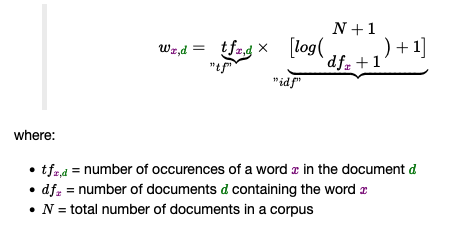

#### 💻 TfidfVectorizer

🧨 raw documents → matrix of tf-idf features

[📚 sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [72]:
texts

['the young dog is running with the cat',
 'running is good for your health',
 'your cat is young',
 'young young young young young cat cat cat']

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
# Instantiating the TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

# Training it on the texts
weighted_words = pd.DataFrame(tf_idf_vectorizer.fit_transform(texts).toarray(),
                 columns = tf_idf_vectorizer.get_feature_names_out())

weighted_words

,cat,dog,for,good,health,is,running,the,with,young,your
0,0.227904,0.357056,0.000000,0.000000,0.000000,0.227904,0.281507,0.714112,0.357056,0.227904,0.000000
1,0.000000,0.000000,0.463709,0.463709,0.463709,0.295980,0.365594,0.000000,0.000000,0.000000,0.365594
2,0.470063,0.000000,0.000000,0.000000,0.000000,0.470063,0.000000,0.000000,0.000000,0.470063,0.580622
3,0.514496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857493,0.000000


**Controlling the vocabulary size:**

In every language, there are many words used in everyday vocabulary:

    🇬🇧 English: ~20,000 words
    🇫🇷 French: ~20,000 words
    🇩🇪 German: ~20,000 words

In a document, we can't afford to vectorize every word!

We can, however, control the number of words to be vectorized ([curse of dimensionality!](https://www.analyticsvidhya.com/blog/2021/04/the-curse-of-dimensionality-in-machine-learning/)):

👉 Scikit-Learn allows us to customize the CountVectorizer and TfidVecdtorizer with key parameters to control vocabulary size.


💻 **Key parameters of [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) (and [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))

   - `max_df/min_df`
   - `max_features`

💻 `max_df` (resp. `min_df`)

When building the vocabulary, CountVectorizer and TfidfVectorizer will remove terms which have a document frequency strictly higher (resp. lower) than the given threshold. max_df and min_df help us building corpus-specific stopwords.

Example: when classifying pieces of text into "basketball" or "football", the word "ball" would appear too often and would be useless for this classification, it would be better to filter it out using max_df

**How to use these parameters in practice?**

   - `max_df` (`min_df`) can be either a `float` between 0.0 and 1.0 or an `integer`
        - `max_df (min_df) = 0.5` ⇔ "ignore terms that appear in more (less) than 50% of the documents"
        - `max_df (min_df) = 20` ⇔ "ignore terms that appear in more (less) than 20 documents"
   - By default, `max_df = 1.0` ⇔ no "frequent" word will be removed
   - By default, `min_df = 0.0` ⇔ no "infrequent" word will be removed

In [92]:
document_frequency = pd.DataFrame(
    [[sum(vectorized_texts[column]>0) for column in vectorized_texts.columns]],
    index = ['document_frequency'],
    columns = vectorized_texts.columns
)

# Number of occurences of each word
document_frequency

,cat,dog,for,good,health,is,running,the,with,young,your
document_frequency,3,1,1,1,1,3,2,1,1,3,2


In [99]:
# Instantiate the CountVectorizer with max_df = 2
count_vectorizer = CountVectorizer(max_df = 2) # removing "cat", "is", "young"

# Train it
X = count_vectorizer.fit_transform(texts)
X = pd.DataFrame(
    X.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = texts
)

X

,dog,for,good,health,running,the,with,your
the young dog is running with the cat,1,0,0,0,1,2,1,0
running is good for your health,0,1,1,1,1,0,0,1
your cat is young,0,0,0,0,0,0,0,1
young young young young young cat cat cat,0,0,0,0,0,0,0,0


💻 **`max_features`**

By specifying `max_features = k` (k being an integer), the CountVectorizer (or the TfidfVectorizer) will build a vocabulary that only considers the top k tokens ordered by term frequency across the corpus.

**How to use "max_features" in practice?**

In [100]:
# CountVectorizer with the 3 most frequent words
count_vectorizer = CountVectorizer(max_features = 3)

X = count_vectorizer.fit_transform(texts)
X = pd.DataFrame(
    X.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = texts
)

X

,cat,is,young
the young dog is running with the cat,1,1,1
running is good for your health,0,1,0
your cat is young,1,1,1
young young young young young cat cat cat,3,0,5


✅ Advantages of the `Tf-idf` representation:

   - Using relative frequency rather than count is robust to document length
   - Takes into account the context of the whole corpus

❌ Disadvantages of the `Tf-idf` representation:

   - Like the `BoW`, `Tf-idf` does NOT capture the **within-document context** → `N-gram` helps here
   - Like the `BoW`, the word order is completely disregarded

### `N-grams`

Example: the two following sentences have the exact same representation:

In [101]:
actors_movie = ["I like the movie but NOT the actors",
                "I like the actors but NOT the movie"]

In [102]:
# Vectorize the sentences
count_vectorizer = CountVectorizer()
actors_movie_vectorized = count_vectorizer.fit_transform(actors_movie)

# Show the representations in a nice DataFrame
actors_movie_vectorized = pd.DataFrame(actors_movie_vectorized.toarray(),
                                       columns = count_vectorizer.get_feature_names_out(),
                                       index = actors_movie)

# Show the vectorized movies
actors_movie_vectorized

,actors,but,like,movie,not,the
I like the movie but NOT the actors,1,1,1,1,1,2
I like the actors but NOT the movie,1,1,1,1,1,2


🧑🏻‍🏫 When using a `bag-of-words` representation, an efficient way to **capture context** is to consider:

   - the count of single tokens (unigrams)
   - the count of pairs (bigrams), triplets (trigrams), and more generally sequences of n words, also known as **n-grams**
   
Examples:

   - "mathematics" is a unigram (n = 1)
   - "machine learning" is a bigram (n = 2)
   - "natural language processing" is a trigram (n = 3)
   - "deep convolutional neural networks" is a 4-gram (n = 4)

💻 **`ngram_range`**

In both _CountVectorizer_ and _TfidfVectorizer_, you can specify the length of your sequences with the parameter `ngram_range = (min_n, max_n)`.

Examples:

   - `ngram_range = (1, 1)` 👉 (by default) will only capture the unigrams (single words)
   - `ngram_range = (1, 2)` 👉 will capture the unigrams, and the bigrams
   - `ngram_range = (1, 3)` 👉 will capture the unigrams, the bigrams, and the trigrams
   - `ngram_range = (2, 3)` 👉 will capture the bigrams, and the trigrams but not the unigrams

😥 With a **unigram vectorization**, we couldn't distinguish two sentences with the same words.

In [103]:
actors_movie_vectorized

,actors,but,like,movie,not,the
I like the movie but NOT the actors,1,1,1,1,1,2
I like the actors but NOT the movie,1,1,1,1,1,2


👩🏻‍🔬 What about a **bigram vectorization**?

In [107]:
# Vectorize the sentences
count_vectorizer_n_gram = CountVectorizer(ngram_range = (2,2)) # BI-GRAMS
actors_movie_vectorized_n_gram = count_vectorizer_n_gram.fit_transform(actors_movie)

# Show the representations in a nice DataFrame
actors_movie_vectorized_n_gram = pd.DataFrame(actors_movie_vectorized_n_gram.toarray(),
                                              columns = count_vectorizer_n_gram.get_feature_names_out(),
                                              index = actors_movie)

# Show the vectorized movies with bigrams
actors_movie_vectorized_n_gram

,actors but,but not,like the,movie but,not the,the actors,the movie
I like the movie but NOT the actors,0,1,1,1,1,1,1
I like the actors but NOT the movie,1,1,1,0,1,1,1


😄 The two sentences are now distinguishable


🥡 General takeaways about Vectorizing

    🤖 ❤️ 🔢

   - There are two methods for vectorizing:
        - `CountVectorizer` (counting)
        - `TfidfVectorizer` (weighing: take the document length into consideration)

   - The most important parameters of these vectorizers are:
        - `min_df` (infrequent words)
        - `max_df` (frequent words)
        - `max_features` (curse of dimensionality)
        - `ngram_range = (min_n, max_n)` (capturing the context of the words)

🚀 Let's discover two NLP algorithms:

   - **(Multinomial) Naive Bayes** → classification algorithm
   - **Latent Dirichlet Allocation (LDA)** → unsupervised topic labeling

## (Multinomial) Naive Bayes Algorithm

The **Multinomial Naive Bayes** algorithm is a classification algorithm based on **Bayes' Theorem** in probability theory

### ✉️ The E-mail Classification Problem

🎯 We want to classify e-mails based on their content:

   - ✅ Normal (N)
   - ☠️ Spam (S)
   
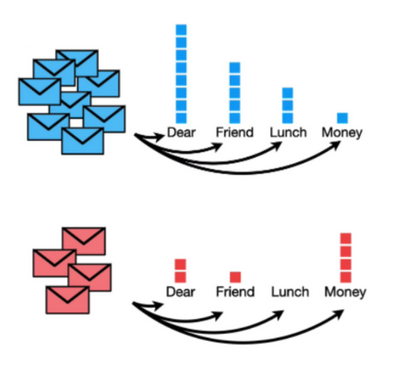

🤔 What is the probability that an e-mail containing some specific words be spam?

👩🏻‍🏫 **Mathematical Approach**

Mathematically speaking, the probability that an e-mail containing specific words is spam can be denoted by:



where

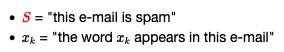

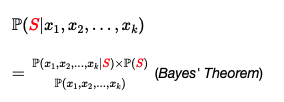

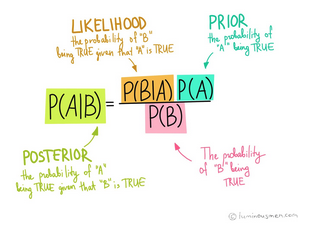

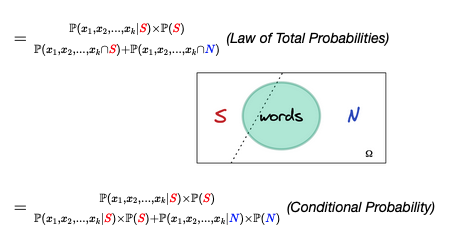

👉 Let's focus on a specific term:

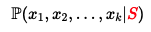

The **Naive Bayes algorithm** makes the strong assumption that the words in an e-mail are **conditionally independent**

By applying the **independence property**:

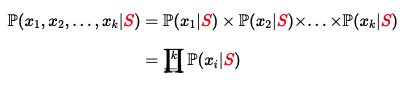

🧨 In the **Naive Bayes algorithm**, the **probability that an e-mail is spam if it contains certain words** is the following:

**Spam Formula**

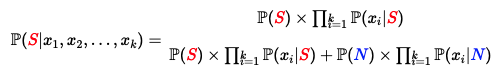

**NOT SURE IF I AGREE WITH THE CALCULATION OF SOME OF THE PROBABILITIES BELOW**

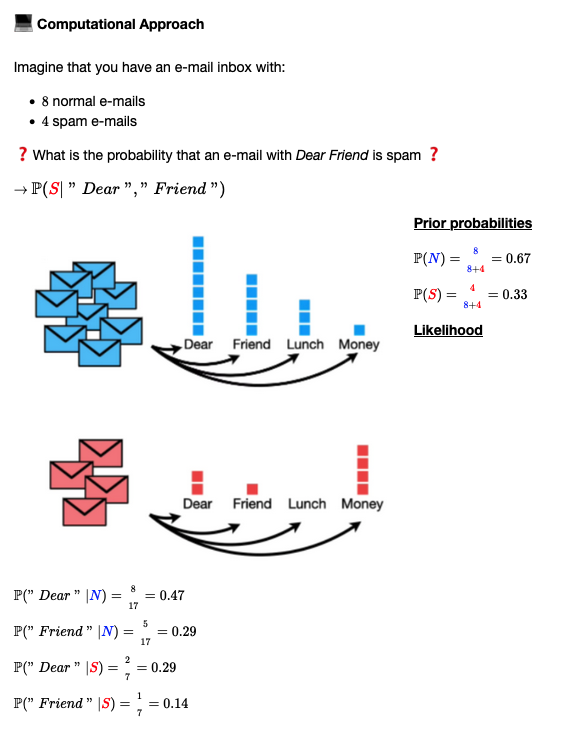

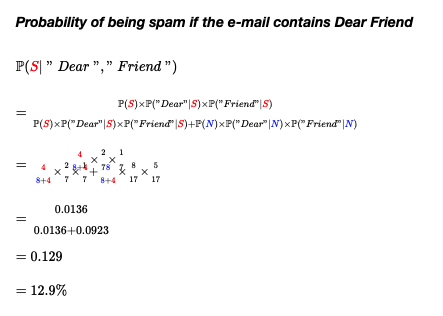

🏂 **Smoothing**

Imagine that you want to compute 

😰 You will be in trouble

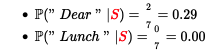

and when multiplying these probabilities, you will have a null probability!

🤔 How do we overcome this problem with words which don't appear in spam e-mails?



👨🏻‍🏫 This is called **smoothing** and α is the **smoothing parameter**

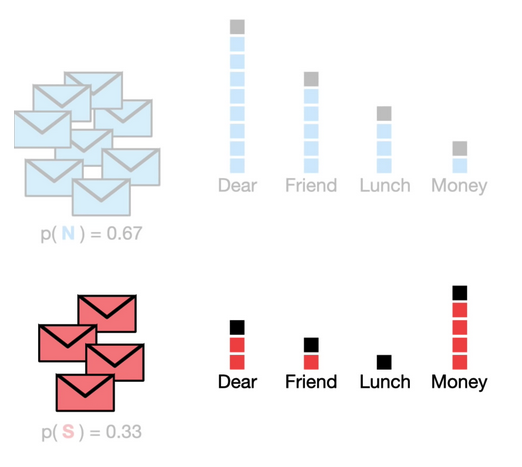

### **Pros and Cons of the NB Algorithm**

✅ Pros:

   - Easy to implement
   - Not an iterative learning process — fast!
   - Works particularly well on text data because it can handle a large vocabulary
   - Not a parametric model (no β to learn, no loss function to minimize)

❌ Cons:

   - Assumes that the words appearing in a document don't depend on any previous words


### 💻 **Implementation of the Naive Bayes Algorithm**

📚 [**`MultinomialNB`**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

✉️ Let's have a look at a dataset with thousands of e-mails classified either as spam or as a normal e-mail.